In [1]:
!pip install astro-eddy==1.2.2

In [2]:
!pip install bettermoments==1.2.1

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [1]:
!pip install celerite

  Using cached celerite-0.4.0-cp38-cp38-win_amd64.whl (311 kB)


In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from eddy import rotationmap
np.random.seed(123)

In [9]:
hdul = fits.open('TWHya_CO_cube_v0.fits', memmap=True)

In [10]:
hdul.info()

Filename: TWHya_CO_cube_v0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   (2000, 2000)   float64   


In [11]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2000                                                  
NAXIS2  =                 2000                                                  
BMAJ    =    3.85393616226E-05                                                  
BMIN    =   3.638029512432E-05                                                  
BPA     =        -74.962059021                                                  
BUNIT   = 'm/s     '                                                            
CTYPE1  = 'RA---SIN'                                                            
CRVAL1  =         165.46590625                                                  
CDELT1  =  -2.777777777778E-06                                                  
CRPIX1  =               1001

In [6]:
data = hdul[0].data

In [12]:
data.shape

(2000, 2000)

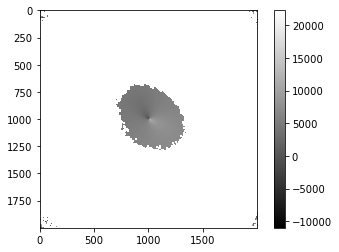

In [38]:
plt.figure()
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.savefig('TWHya_image.png')

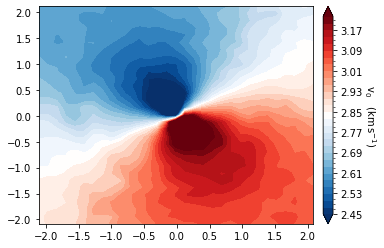

In [39]:
# Load Data from FITS file
cube = rotationmap(path='TWHya_CO_cube_v0.fits',
                   uncertainty='TWHya_CO_cube_dv0.fits',
                   downsample='beam',
                   clip=2.0)
# Plot Data
fig, ax = plt.subplots()
levels = np.nanpercentile(cube.data, [2, 98]) - cube.vlsr
levels = max(abs(levels[0]), abs(levels[1]))
levels = cube.vlsr + np.linspace(-levels, levels, 30)
im = ax.contourf(cube.xaxis, cube.yaxis, cube.data, levels,
                 cmap=rotationmap.colormap(), extend='both', zorder=-9)
cb = plt.colorbar(im, pad=0.03, format='%.2f')
cb.minorticks_on()
cb.set_label(r'${\rm v_{0} \quad (km\,s^{-1})}$',
             rotation=270, labelpad=15)
plt.savefig('TWHya_rotatemap.png')

In [19]:
params = {}

params['x0'] = 0
params['y0'] = 1
params['PA'] = 2
params['mstar'] = 3
params['vlsr'] = 4

p0 = [0.0, 0.0, 151., 0.65, 2.8e3]

params['inc'] = 6.8     # degrees
params['dist'] = 60.1   # parsec

params['r_min'] = 2.0 * cube.bmaj
params['r_max'] = 3.25

Assuming:
	p0 = [${\rm x0}$, ${\rm y0}$, ${\rm PA}$, ${\rm mstar}$, ${\rm vlsr}$].
Optimized starting positions:
	p0 = ['-2.62e-03', '1.91e-02', '1.51e+02', '5.96e-01', '2.84e+03']


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:04<00:00, 66.32it/s]


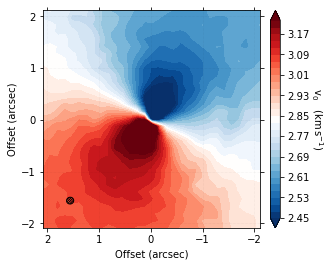

In [36]:
percentiles = cube.fit_map(p0=p0, params=params, nwalkers=16, nburnin=200, nsteps=100, plots="mask", returns="dict")

In [24]:
percentiles

{'PA': 151.19348836044222,
 'mstar': 0.5957680261192716,
 'inc': 6.8,
 'r_min': 0.0,
 'r_max': 100000.0,
 'vfunc': <bound method rotationmap._proj_vkep of <eddy.fit_cube.rotationmap object at 0x000001E2C2D55610>>,
 'beam': False,
 'exclude_r': False,
 'PA_min': -3.141592653589793,
 'PA_max': 3.141592653589793,
 'exclude_PA': False,
 'abs_PA': False,
 'x0': -0.002403720174998268,
 'y0': 0.019127200200593185,
 'dist': 60.1,
 'vlsr': 2840.6828437157833,
 'vp_q': -0.5,
 'vr_100': 0.0,
 'vr_q': 0.0,
 'z0': 0.0,
 'psi': 1.0,
 'z1': 0.0,
 'phi': 1.0,
 'w_i': 0.0,
 'w_r': 1.0,
 'w_t': 0.0,
 'shadowed': False}

In [30]:
print("Source Center (x0, y0): ", (percentiles['x0'], percentiles['y0']))
print("Position angle of the disk (PA): ", percentiles['PA'])
print("Stellar Mass (MSTAR): ", percentiles['mstar'])
print("Systemic Velocity (VLSR): ", percentiles['vlsr'])

Source Center (x0, y0):  (-0.002403720174998268, 0.019127200200593185)
Position angle of the disk (PA):  151.19348836044222
Stellar Mass (MSTAR):  0.5957680261192716
Systemic Velocity (VLSR):  2840.6828437157833
